Este é um notebook do Google Colab de exemplo para os alunos de **PGCC005 Metodologia de Pesquisa 2**.

*É possível alternar trechos de código com trechos textuais em um notebook, como este bloco inicial.*

In [14]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import math
from IPython.display import display, HTML
from statsmodels.stats import weightstats as stests
from sklearn. linear_model import LinearRegression
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36')]
urllib.request.install_opener(opener)

#url = "http://aulas.artificial.eng.br/Home/pgcc005/dados-vacinados-metod2-aula.csv.gz"
url = "http://aulas.artificial.eng.br/Home/pgcc005/dados-vacinados-metod2-atividade.csv.gz"
urllib.request.urlretrieve (url, "dados-vacinados-metod2.csv.gz")

vacinadf = pd.read_csv("dados-vacinados-metod2.csv.gz",index_col=False, compression='gzip')
vacinadf['vacina_dataAplicacao']= pd.to_datetime(vacinadf['vacina_dataAplicacao'], format='%Y-%m-%d')

In [8]:
# Q.01) 
# Quais são os tipos de dados (cf slides da aula de estatística descritiva) disponíveis na base? 
# Avalie cada campo, não tome como base os tipos do pandas.
# nominal, ordinal, númerico

#display(vacinadf.head(3))
display(*vacinadf)

print("\nTIPOS DE DADOS")
print('\n======================================')
print('document_id - nominal')
print('paciente_id - nominal')
print('paciente_idade - ordinal')
print('paciente_dataNascimento - númerico')
print('paciente_enumSexoBiologico - nominal')
print('paciente_racaCor_codigo - nominal')
print('paciente_racaCor_valor - nominal')
print('paciente_endereco_coIbgeMunicipio - nominal')
print('paciente_endereco_coPais - nominal')
print('paciente_endereco_nmMunicipio - nominal')
print('paciente_endereco_nmPais - nominal')
print('paciente_endereco_uf - nominal')
print('paciente_endereco_cep - nominal')
print('paciente_nacionalidade_enumNacionalidade - nominal')
print('estabelecimento_valor - nominal')
print('estabelecimento_razaoSocial - nominal')
print('estalecimento_noFantasia - nominal')
print('estabelecimento_municipio_codigo - nominal')
print('estabelecimento_municipio_nome - nominal')
print('estabelecimento_uf - nominal')
print('vacina_grupoAtendimento_codigo - nominal')
print('vacina_grupoAtendimento_nome - nominal')
print('vacina_categoria_codigo - nominal')
print('vacina_categoria_nome - nominal')
print('vacina_lote - númerico')
print('vacina_fabricante_nome - nominal')
print('vacina_fabricante_referencia - nominal')
print('vacina_dataAplicacao - numerico')
print('vacina_descricao_dose - nominal')
print('vacina_codigo - nominal')
print('vacina_nome - nominal')
print('sistema_origem - nominal')
print('data_importacao_rnds - numérico')

'document_id'

'paciente_id'

'paciente_idade'

'paciente_dataNascimento'

'paciente_enumSexoBiologico'

'paciente_racaCor_codigo'

'paciente_racaCor_valor'

'paciente_endereco_coIbgeMunicipio'

'paciente_endereco_coPais'

'paciente_endereco_nmMunicipio'

'paciente_endereco_nmPais'

'paciente_endereco_uf'

'paciente_endereco_cep'

'paciente_nacionalidade_enumNacionalidade'

'estabelecimento_valor'

'estabelecimento_razaoSocial'

'estalecimento_noFantasia'

'estabelecimento_municipio_codigo'

'estabelecimento_municipio_nome'

'estabelecimento_uf'

'vacina_grupoAtendimento_codigo'

'vacina_grupoAtendimento_nome'

'vacina_categoria_codigo'

'vacina_categoria_nome'

'vacina_lote'

'vacina_fabricante_nome'

'vacina_fabricante_referencia'

'vacina_dataAplicacao'

'vacina_descricao_dose'

'vacina_codigo'

'vacina_nome'

'sistema_origem'

'data_importacao_rnds'


TIPOS DE DADOS

document_id - nominal
paciente_id - nominal
paciente_idade - ordinal
paciente_dataNascimento - númerico
paciente_enumSexoBiologico - nominal
paciente_racaCor_codigo - nominal
paciente_racaCor_valor - nominal
paciente_endereco_coIbgeMunicipio - nominal
paciente_endereco_coPais - nominal
paciente_endereco_nmMunicipio - nominal
paciente_endereco_nmPais - nominal
paciente_endereco_uf - nominal
paciente_endereco_cep - nominal
paciente_nacionalidade_enumNacionalidade - nominal
estabelecimento_valor - nominal
estabelecimento_razaoSocial - nominal
estalecimento_noFantasia - nominal
estabelecimento_municipio_codigo - nominal
estabelecimento_municipio_nome - nominal
estabelecimento_uf - nominal
vacina_grupoAtendimento_codigo - nominal
vacina_grupoAtendimento_nome - nominal
vacina_categoria_codigo - nominal
vacina_categoria_nome - nominal
vacina_lote - númerico
vacina_fabricante_nome - nominal
vacina_fabricante_referencia - nominal
vacina_dataAplicacao - numerico
vacina_descricao

**RESPOSTA Q01**
TIPOS DE DADOS
======================================
document_id - nominal

paciente_id - nominal

paciente_idade - ordinal

paciente_dataNascimento - númerico

paciente_enumSexoBiologico - nominal

paciente_racaCor_codigo - nominal

paciente_racaCor_valor - nominal

paciente_endereco_coIbgeMunicipio - nominal

paciente_endereco_coPais - nominal

paciente_endereco_nmMunicipio - nominal

paciente_endereco_nmPais - nominal

paciente_endereco_uf - nominal

paciente_endereco_cep - nominal

paciente_nacionalidade_enumNacionalidade - nominal

estabelecimento_valor - nominal

estabelecimento_razaoSocial - nominal

estalecimento_noFantasia - nominal

estabelecimento_municipio_codigo - nominal

estabelecimento_municipio_nome - nominal

estabelecimento_uf - nominal

vacina_grupoAtendimento_codigo - nominal

vacina_grupoAtendimento_nome - nominal

vacina_categoria_codigo - nominal

vacina_categoria_nome - nominal

vacina_lote - númerico

vacina_fabricante_nome - nominal

vacina_fabricante_referencia - nominal

vacina_dataAplicacao - numerico

vacina_descricao_dose - nominal

vacina_codigo - nominal

vacina_nome - nominal

sistema_origem - nominal

data_importacao_rnds - numérico

In [ ]:
# Q.02) 
# A) Quais são as cidades dos estabelecimentos com dados disponíveis na base? 
# B) Quais são as cidades dos pacientes com dados disponíveis na base? 
# C) Compare e comente os resultados.

# RESPOSTA A)
print("\nCIDADES DOS ESTABELECIMENTOS")
print('\n======================================')
df1 = vacinadf.sort_values(by='estabelecimento_municipio_nome',ascending=True)
df1 = df1.estabelecimento_municipio_nome.unique()
display(*df1)

# RESPOSTA B)
print('\nCIDADES DOS PACIENTES')
print('\n======================================')
df2 = vacinadf.sort_values(by='paciente_endereco_nmMunicipio',ascending=True)
df2 = df2.paciente_endereco_nmMunicipio.unique()
display(*df2)

**RESPOSTA Q02**
Observa-se que existem pessoas de cidades diferentes das cidades dos estabelecimentos que foram vacinadas. 
A possibilidade é em virtude do cadastro das cidades das pessoas que receberam as vacinas se referirem a cidade de nascimento.

In [ ]:
# Q.03) 
# A) Escolha uma cidade e escolha dois períodos de sete dias (não sobrepostos) dentro da faixa de tempo disponível na base. 
#    Calcule a tendência central (média, mediana e/ou moda, conforme possibilidade) e desvio padrão para idade. 
# B) Que análise pode ser feita observando cada período e comparando os períodos?

# RESPOSTA A)
periodo1 = vacinadf[ (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & (vacinadf['vacina_dataAplicacao'].between('2021-3-14','2021-3-20', inclusive=True))]['paciente_idade']
periodo2 = vacinadf[ (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & (vacinadf['vacina_dataAplicacao'].between('2021-3-21','2021-3-27', inclusive=True))]['paciente_idade'] 

print('PERÍODO 01')
print('Média.........:', periodo1.mean())
print('Mediana.......:', periodo1.median())
print('Moda..........:', periodo1.mode())
print('Desvio Padrão.:', periodo1.std())

print('PERÍODO 02')
print('Média.........:', periodo2.mean())
print('Mediana.......:', periodo2.median())
print('Moda..........:', periodo2.mode())
print('Desvio Padrão.:', periodo2.std())

PERÍODO 01
Média.........: 65.74204545454545
Mediana.......: 77.0
Moda..........: 0    78
dtype: int64
Desvio Padrão.: 21.78428810154567
PERÍODO 02
Média.........: 72.50655903128154
Mediana.......: 74.0
Moda..........: 0    76
dtype: int64
Desvio Padrão.: 8.282991420939444


**RESPOSTA Q03**
Analisando o período 1 e período 2, ambos apresentam uma tendência dos dados para direita, uma vez que mediana e a moda estão distantes da média. Com relação a amplitude, o período 1 apresenta aproximadamente 21,8. E para o período 2 a amplitude é de 8,3.

,document_id,estabelecimento_municipio_nome,paciente_idade,paciente_racaCor_codigo,paciente_racaCor_valor
vacina_grupoAtendimento_nome,,,,,
Pessoas de 80 anos ou mais,6364,6364,6364,6364,6364
Pessoas de 75 a 79 anos,4707,4707,4707,4707,4707
Pessoas de 70 a 74 anos,2690,2690,2690,2690,2690
Outros,1838,1838,1838,1838,1838
Quilombola,278,278,278,278,278
Pessoas de 60 nos ou mais Institucionalizadas,207,207,207,207,207
Pessoas de 65 a 69 anos,171,171,171,171,171
Pessoas de 60 a 64 anos,112,112,112,112,112
Técnico de Enfermagem,84,84,84,84,84


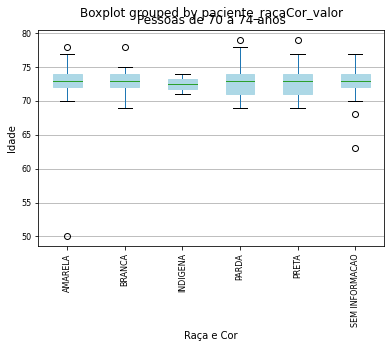

<Figure size 720x504 with 0 Axes>

       paciente_idade
count     2690.000000
mean        72.564684
std          1.393184
min         50.000000
25%         72.000000
50%         73.000000
75%         74.000000
max         79.000000


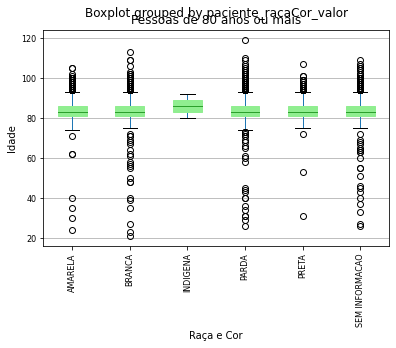

<Figure size 720x504 with 0 Axes>

       paciente_idade
count     6364.000000
mean        84.006914
std          5.962633
min         21.000000
25%         81.000000
50%         83.000000
75%         86.000000
max        119.000000


In [ ]:
# Q.04) 
# A) Escolha uma cidade, identifique os 15 grupos de atendimento com maior número de vacinados. 
# B) Escolha dois grupos de atendimento dentre estes. 
#    Para cada grupo, faça box-plot das idades em cada grupo divididos conforme raça/cor. 
# c) O que você observa? Comente.

filtro_0 = vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA'
df = vacinadf.loc[:,['document_id','estabelecimento_municipio_nome','vacina_grupoAtendimento_nome','paciente_idade','paciente_racaCor_codigo','paciente_racaCor_valor']]
df = df[filtro_0]
df = df.pivot_table(index = [ "vacina_grupoAtendimento_nome" ], aggfunc='count')
df = df.sort_values(by='document_id',ascending=False)
display(df.head(15)) #15 grupos de atendimento com maior número de vacinados.

# RESPOSTA B) 
filtro_1 = (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & (vacinadf['vacina_grupoAtendimento_nome'] == 'Pessoas de 70 a 74 anos')
df = vacinadf.loc[:,['document_id','estabelecimento_municipio_nome','vacina_grupoAtendimento_nome','paciente_idade','paciente_racaCor_valor']]
df = df[filtro_1]
c = "lightblue"

boxplot1 = df.boxplot(column=['paciente_idade'], by='paciente_racaCor_valor', 
                      showfliers=True, 
                      grid=False, 
                      rot=90, 
                      fontsize=8,  
                      patch_artist=True, 
                      boxprops=dict(facecolor=c, color=c))
boxplot1.yaxis.grid(True)
boxplot1.set_title('Pessoas de 70 a 74 anos')
boxplot1.set_xlabel('Raça e Cor')
boxplot1.set_ylabel('Idade')
fig = plt.figure(figsize =(10.00, 7.00))
plt.show()
print(df.describe())

filtro_2 = (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & (vacinadf['vacina_grupoAtendimento_nome'] == 'Pessoas de 80 anos ou mais')
df = vacinadf.loc[:,['document_id','estabelecimento_municipio_nome','vacina_grupoAtendimento_nome','paciente_idade','paciente_racaCor_valor']]
df = df[filtro_2]
c = "lightgreen"
boxplot2 = df.boxplot(column=['paciente_idade'], by='paciente_racaCor_valor', 
                      showfliers=True, 
                      grid=False, 
                      rot=90, 
                      fontsize=8,  
                      patch_artist=True, 
                      boxprops=dict(facecolor=c, color=c))
boxplot2.yaxis.grid(True)
boxplot2.set_title('Pessoas de 80 anos ou mais')
boxplot2.set_xlabel('Raça e Cor')
boxplot2.set_ylabel('Idade')
fig = plt.figure(figsize =(10.00, 7.00))
plt.show()
print(df.describe())

**RESPOSTA Q04**
O Boxplot 01 e 02 mostram outlines que indicam falta de simetria nos dados. Isto implica possíveis equívocos com relação as idades. No Boxplot 1, há uma maior concentração de dados em um dos quartis para a raça/cor preta e parda. E com relação ao Boxplot 2, apenas raça/cor indigena apresenta distância entre os quartis de forma equânime. 


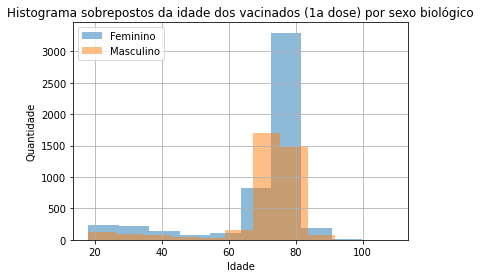

In [ ]:
# Q.05) 
# A) Escolha uma cidade e um período de 15 dias, faça 'histogramas sobrepostos da idade dos vacinados (1a dose) por sexo biológico'. 
# B) O que você observa? Comente.  

# RESPOSTA A)
#df = vacinadf 
df = vacinadf.loc[:,['estabelecimento_municipio_nome','vacina_dataAplicacao','paciente_idade','vacina_descricao_dose','paciente_enumSexoBiologico']]
x = df[(df['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & (df['vacina_dataAplicacao'].between('2021-3-14','2021-3-27', inclusive=True)) & (df['paciente_enumSexoBiologico'] == 'F' ) & (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose' )]
y = df[(df['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & (df['vacina_dataAplicacao'].between('2021-3-14','2021-3-27', inclusive=True)) & (df['paciente_enumSexoBiologico'] == 'M' ) & (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose' )]

plt.hist(x['paciente_idade'], bins = 10, alpha = 0.5, label='Feminino')
plt.hist(y['paciente_idade'], bins = 10, alpha = 0.5, label='Masculino')
plt.legend(loc='upper left')
plt.title('Histograma sobrepostos da idade dos vacinados (1a dose) por sexo biológico')
plt.grid(True)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

**RESPOSTA Q05**
Analisando o histograma, observa-se que há uma acentuação expressiva pessoas do sexo biológico feminino com idades entre 60 e 80 anos que tomaram a 1a dose da vacina, em relação as pessoas do sexo biológico masculino de mesma idade.



In [ ]:
# Q.06) 
# Escolha uma categoria de vacinados (categoria é diferente de grupo) e duas cidades, considere os vacinados em 1a dose como a população de interesse. 
# Para cada cidade, calcule a média de idade desta população. 
# Faça uma amostragem aleatória de 10% de indivíduos desta população, calcule a média desta amostra. 
# Apresente os valores no texto, compare e comente sobre os valores destas médias.
# Simple random sample   – Amostragem Aleatória Simples
# Stratified sample      – Amostragem Aleatória Estratificada
# Systematic sample      – Amostragem Sistemática
# display(*vacinadf['vacina_categoria_nome'].unique()) # visualizar categorias

df = vacinadf.loc[:,['estabelecimento_municipio_nome','vacina_descricao_dose','vacina_categoria_nome','paciente_idade']]
df.dropna(subset=['vacina_categoria_nome'], inplace=True)

filtro1 = (df['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & \
          (df['vacina_categoria_nome'] == 'Faixa Etária') & \
          (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose' )

filtro2 = (df['estabelecimento_municipio_nome'] == 'SALVADOR') & \
          (df['vacina_categoria_nome'] == 'Faixa Etária') & \
          (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose' )

df1 = df[filtro1]
df2 = df[filtro2]

#população da Cidade 1
print("\nVACINADOS 1ª DOSE DE VITORIA DA CONQUISTA")
print("-----------------------------------------------")                   
media_df1 = df1['paciente_idade'].sample(frac=0.1)
print("Média Geral................: ", df1['paciente_idade'].mean())
print("Média de 10% da amostra....: ", media_df1.mean())

#população da Cidade 2
print("\nVACINADOS 1ª DOSE DE SALVADOR")
print("------------------------------------------------")
media_df2 = df2['paciente_idade'].sample(frac=0.1)
print("Média Geral................: ", df2['paciente_idade'].mean())
print("Média de 10% da amostra....: ", media_df2.mean())


VACINADOS 1ª DOSE DE VITORIA DA CONQUISTA
-----------------------------------------------
Média Geral................:  78.04318488529015
Média de 10% da amostra....:  77.98412698412699

VACINADOS 1ª DOSE DE SALVADOR
------------------------------------------------
Média Geral................:  72.73720926051337
Média de 10% da amostra....:  72.75584322186263


**RESPOSTA Q06**
Analisando os vacinados de 1a dose na Cidade de Vitória da Conquista, de acordo com o valor de amostra de 10% para o valor da média geral é pouco expressivo, podendo indicar possibilidade pequena de erro. Com relação aos vacinados de 1a dose de Salvador, a diferença entre a média geral e a média de 10% da amostra é muito inferior. O que também pode indicar pouca possibilidade de erro.

In [ ]:
# Q.07) 
# Considere a população do item anterior (de uma das cidades). 
# a) Faça uma amostragem aleatória de 10% de indivíduos e 
# b) outra amostragem aleatória de 1% de indivíduos desta população. 
# c) Calcule a média e o erro padrão da cada amostra. 
# d) O que você observa? Calcule o intervalo de confiança para 90% para cada amostra. 
# e) Compare com a média real da população. Comente.

df = vacinadf.loc[:,['estabelecimento_municipio_nome','vacina_descricao_dose','vacina_categoria_nome','paciente_idade']]
df.dropna(subset=['vacina_categoria_nome'], inplace=True)

filtro = (df['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & \
         (df['vacina_categoria_nome'] == 'Faixa Etária') & \
         (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose' )

df = df[filtro]

mediaindividuos10 = df['paciente_idade'].sample(frac=0.10).mean() 
mediaindividuos01 = df['paciente_idade'].sample(frac=0.01).mean()
erropadrao10 = df['paciente_idade'].sample(frac=0.10).std() 
erropadrao01 = df['paciente_idade'].sample(frac=0.01).std()
intervaloconfianca10 = st.norm.interval(0.90, loc=mediaindividuos10, scale=erropadrao10)
intervaloconfianca01 = st.norm.interval(0.99, loc=mediaindividuos01, scale=erropadrao01)

print("Amostragem aleatória de 10% de indivíduos....: ", mediaindividuos10)     # amostragem aleatória de 10% de indivíduos
print("Amostragem aleatória de 01% de indivíduos....: ", mediaindividuos01)     # amostragem aleatória de 01% de indivíduos
print("Erro padrão de 10% de indivíduos.............: ", erropadrao10)          # erro padrão de 10% de indivíduos
print("Erro padrão de 01% de indivíduos.............: ", erropadrao01)          # erro padrão de 01% de indivíduos
print("Intervalo de confiança de 10% de indivíduos..: ", intervaloconfianca10)  # intervalo de confiança de 10% de indivíduos
print("Intervalo de confiança de 01% de indivíduos..: ", intervaloconfianca01)  # intervalo de confiança de 01% de indivíduos

Amostragem aleatória de 10% de indivíduos....:  78.06507936507937
Amostragem aleatória de 01% de indivíduos....:  77.9920634920635
Erro padrão de 10% de indivíduos.............:  5.700006215340809
Erro padrão de 01% de indivíduos.............:  5.015607386978915
Intervalo de confiança de 10% de indivíduos..:  (68.68940346813011, 87.44075526202863)
Intervalo de confiança de 01% de indivíduos..:  (65.07271500958687, 90.91141197454012)


**RESPOSTA 07**
Observa-se uma variação praticamente inexistente com relação aos dados levantados na amostragem aleatória de 10% e 01% de indivíduos. Possivelmente, envidencia uma tendencia de pouca variação no desvio padrão.

In [ ]:
# Q.08) 
# A) Escolha três categorias de vacinados e uma cidade, faça a tabela de contingência de vacinação em 1a dose entre estas categorias e o atributo caça/cor. 
# B) O que você observa? Comente.

# RESPOSTA A)
filtro  =   (vacinadf['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose') & \
            (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & \
            (
                (vacinadf['vacina_categoria_nome'] =='Trabalhadores de Saúde') | \
                (vacinadf['vacina_categoria_nome'] =='Faixa Etária') | \
                (vacinadf['vacina_categoria_nome'] =='Comorbidades')
            )
df = vacinadf.loc[:,['estabelecimento_municipio_nome','vacina_descricao_dose','vacina_categoria_nome','paciente_racaCor_valor']]
df = df[filtro]

df.dropna(subset=['vacina_categoria_nome'], inplace=True)
pd.crosstab(df['vacina_categoria_nome'], df['paciente_racaCor_valor'])


paciente_racaCor_valor,AMARELA,BRANCA,INDIGENA,PARDA,PRETA,SEM INFORMACAO
vacina_categoria_nome,,,,,,
Comorbidades,2,4,0,5,0,4
Faixa Etária,2422,2430,3,4150,720,2872
Trabalhadores de Saúde,322,362,0,511,39,554


**RESPOSTA Q08**
Analisando os dados trazidos para vacinados com 1a dose da cidade de Vitória da Conquista da categoria Comorbidades e da raca/Cor indigena e perta não apresenta registro de vacinados. Trabalhadores da saúde de raca/Cor indigena também não aprenta registros de vacinados. Além disto, o maior número de vacinados encontra-se na catergoria de Faixa Etária em relação as demais. Observa-se ainda que a soma de vacinados auto-declarado pardos é maior que o valor nas demais categorias.

a= [[0.80075811]]  b= [424.65158916]


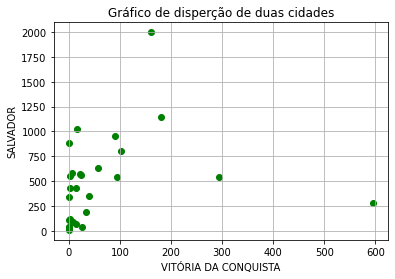

'Coeficiente de correlação de parson'

,estabelecimento_municipio_nome_x,vacina_categoria_nome_x,vacina_descricao_dose_x,estabelecimento_municipio_nome_y,vacina_categoria_nome_y,vacina_descricao_dose_y
estabelecimento_municipio_nome_x,1.000000,1.000000,1.000000,0.224606,0.224606,0.224606
vacina_categoria_nome_x,1.000000,1.000000,1.000000,0.224606,0.224606,0.224606
vacina_descricao_dose_x,1.000000,1.000000,1.000000,0.224606,0.224606,0.224606
estabelecimento_municipio_nome_y,0.224606,0.224606,0.224606,1.000000,1.000000,1.000000
vacina_categoria_nome_y,0.224606,0.224606,0.224606,1.000000,1.000000,1.000000
vacina_descricao_dose_y,0.224606,0.224606,0.224606,1.000000,1.000000,1.000000


a= [[0.80075811]]  b= [424.65158916]


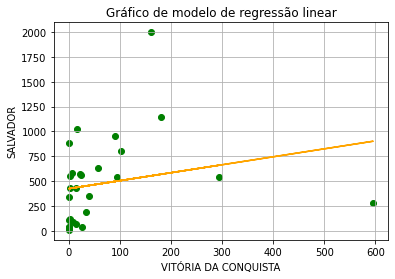

In [ ]:
# Q.09)
# A) Escolha uma categoria de vacinados e duas cidades, 
# B) obtenha o total diário de vacinados em 1a dose desta categoria para cada cidade. 
# c) Faça um gráfico de dispersão de total de vacinados em uma cidade vs outra cidade. 
# d) Calcule o coeficiente de correlação de Pearson e 
# e) Obtenha o modelo de regressão linear. 
# f) Comente sobre o gráfico e os resultados.

df = vacinadf
df['vacina_dataAplicacao'] = pd.to_datetime(df['vacina_dataAplicacao'].dt.strftime('%Y-%m-%d'))
df = df.loc[:,['estabelecimento_municipio_nome', 'vacina_dataAplicacao', 'vacina_categoria_nome', 'vacina_descricao_dose']]

#Escolhendo as cidades e parâmetros:
filtro1 = df[(df['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & \
            (df['vacina_categoria_nome'] == 'Trabalhadores de Saúde') & \
            (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose')]             

filtro2 = df[(df['estabelecimento_municipio_nome'] == 'SALVADOR') & \
            (df['vacina_categoria_nome'] == 'Trabalhadores de Saúde')& \
            (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose')]                    

#Calculando o total diário de vacinação para cada cidade:
df1 = filtro1.pivot_table(index = ['vacina_dataAplicacao'],aggfunc='count')
df2 = filtro2.pivot_table(index = ['vacina_dataAplicacao'],aggfunc='count')


#Unindo as tabelas
df3 = pd.merge(df1, df2, how="outer", on=['vacina_dataAplicacao'])
df3.fillna(0, inplace=True)

#Plotando o gráfico de disperção de duas cidades
X=df3['estabelecimento_municipio_nome_x'].values.reshape(-1, 1) 
Y=df3['estabelecimento_municipio_nome_y'].values.reshape(-1, 1) 

lr = LinearRegression().fit(X, Y)
Y_pred = lr.predict(X)

print("a=", lr.coef_," b=",lr.intercept_)
plt.scatter(X, Y, color = 'green')
#plt.plot(X, Y_pred, color = 'orange')
plt.title('Gráfico de disperção de duas cidades')
plt.grid(True)
plt.xlabel('VITÓRIA DA CONQUISTA')
plt.ylabel('SALVADOR')
plt.show()

#Coeficiente de correlação de parson:
pearson = df3.corr(method='pearson')
display("Coeficiente de correlação de parson", pearson)

#Modelo de regressão linear:
X=df3['estabelecimento_municipio_nome_x'].values.reshape(-1, 1) 
Y=df3['estabelecimento_municipio_nome_y'].values.reshape(-1, 1) 

lr = LinearRegression().fit(X, Y)
Y_pred = lr.predict(X)

print("a=", lr.coef_," b=",lr.intercept_)
plt.scatter(X, Y, color = 'green')
plt.plot(X, Y_pred, color = 'orange')
plt.title('Gráfico de modelo de regressão linear')
plt.grid(True)
plt.xlabel('VITÓRIA DA CONQUISTA')
plt.ylabel('SALVADOR')
plt.show()

**RESPOSTA Q09**

In [ ]:
# Q.10)
# A) Selecione uma semana específica e uma categoria (Faixa Etária ou Trabalhadores de Saúde), 
# B) escolha duas cidades e 
# C) obtenha as idades dos vacinados em 1a dose em cada. 
# D) Verifique a hipótese da média de idades entre as cidades serem diferentes. 
# E) Explique seus passos e conclusão.

# RESPOSTA E)
df = vacinadf

filtro1 = (df['estabelecimento_municipio_nome'] == 'SALVADOR') & \
          (df['vacina_categoria_nome'] == 'Trabalhadores de Saúde') & \
          (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose' ) & \
          (df['vacina_dataAplicacao'].between('2021-3-14','2021-3-20', inclusive=True))

filtro2 = (df['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA') & \
          (df['vacina_categoria_nome'] == 'Trabalhadores de Saúde') & \
          (df['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose' ) & \
          (df['vacina_dataAplicacao'].between('2021-3-14','2021-3-20', inclusive=True))

df1 = df[filtro1]
df2 = df[filtro2]

# RESPOSTA c)
print('\n Idades dos vacinados em 1a dose - SALVADOR/BA')
print('\n======================================')
df1 = df1.sort_values(by='paciente_endereco_nmMunicipio',ascending=True)
df1 = df1.sort_values(by='paciente_idade',ascending=True)
df1 = df1.loc[:,['estabelecimento_municipio_nome','vacina_categoria_nome','vacina_descricao_dose','paciente_idade']]
display(df1.head(5))

print('\n Idades dos vacinados em 1a dose - VITORIA DA CONQUISTA/BA')
print('\n======================================')
df2 = df2.sort_values(by='paciente_endereco_nmMunicipio',ascending=True)
df2 = df2.sort_values(by='paciente_idade',ascending=True)
df2 = df2.loc[:,['estabelecimento_municipio_nome','vacina_categoria_nome','vacina_descricao_dose','paciente_idade']]
display(df2.head(5))

#teste de hipótese
ztest, pval = stests.ztest(x1=df1['paciente_idade'], x2=df2['paciente_idade'], value=0, alternative='two-sided')

print("zteste..:", float(ztest))
print("pval....:", float(pval))

#D) Verifique a hipótese da média de idades entre as cidades serem diferentes.
print("As médias das idades das duas cidades são diferentes?\n")

print('\n======================================')

if pval < 0.05:
  print("Hipótese nula: Aceita")
else:
  print("Hipótese nula: Rejeitada")

print("\nMédias das idades por cidade:")
print('Média de Salvador.............:', df1['paciente_idade'].mean())
print('Média de Vitória da Conquista.:', df2['paciente_idade'].mean())


 Idades dos vacinados em 1a dose em cada - SALVADOR/BA



,estabelecimento_municipio_nome,vacina_categoria_nome,vacina_descricao_dose,paciente_idade
189997,SALVADOR,Trabalhadores de Saúde,1ª Dose,18
139435,SALVADOR,Trabalhadores de Saúde,1ª Dose,18
166392,SALVADOR,Trabalhadores de Saúde,1ª Dose,18
139583,SALVADOR,Trabalhadores de Saúde,1ª Dose,18
137070,SALVADOR,Trabalhadores de Saúde,1ª Dose,18



 Idades dos vacinados em 1a dose em cada - VITORIA DA CONQUISTA/BA



,estabelecimento_municipio_nome,vacina_categoria_nome,vacina_descricao_dose,paciente_idade
19487,VITORIA DA CONQUISTA,Trabalhadores de Saúde,1ª Dose,18
204228,VITORIA DA CONQUISTA,Trabalhadores de Saúde,1ª Dose,18
22483,VITORIA DA CONQUISTA,Trabalhadores de Saúde,1ª Dose,18
198080,VITORIA DA CONQUISTA,Trabalhadores de Saúde,1ª Dose,18
197213,VITORIA DA CONQUISTA,Trabalhadores de Saúde,1ª Dose,18


zteste..: 11.43128869070693
pval....: 2.9174653410542765e-30
As médias das idades das duas cidades são diferentes?


Hipótese nula: Aceita

Médias das idades por cidade:
Média de Salvador.............: 40.074971601666036
Média de Vitória da Conquista.: 34.368703108252944


**RESPOSTA Q10**